## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

## Data Preparation

In [116]:
# Your code here - remember to use markdown cells for comments as well!
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [120]:
df = df.reset_index()
encoder = OneHotEncoder()
# apply on df
# color_1hot = encoder.fit_transform(df_clean["zipcode"].values.reshape(-1,1))
# color_1hot_df = pd.DataFrame(color_1hot.toarray())
# df_clean = pd.concat([df_clean.drop('zipcode', axis = 1), color_1hot_df], axis = 1)
zipcode_trans = encoder.fit_transform(df['zipcode'].values.reshape(-1,1))
zipcode_trans.todense()
encoder.get_feature_names()
zipcode_df =pd.DataFrame(zipcode_trans.todense(), columns = encoder.get_feature_names())
zipcode_df
df = df.join(zipcode_df)
df

ValueError: columns overlap but no suffix specified: Index(['x0_98001', 'x0_98002', 'x0_98003', 'x0_98004', 'x0_98005', 'x0_98006',
       'x0_98007', 'x0_98008', 'x0_98010', 'x0_98011', 'x0_98014', 'x0_98019',
       'x0_98022', 'x0_98023', 'x0_98024', 'x0_98027', 'x0_98028', 'x0_98029',
       'x0_98030', 'x0_98031', 'x0_98032', 'x0_98033', 'x0_98034', 'x0_98038',
       'x0_98039', 'x0_98040', 'x0_98042', 'x0_98045', 'x0_98052', 'x0_98053',
       'x0_98055', 'x0_98056', 'x0_98058', 'x0_98059', 'x0_98065', 'x0_98070',
       'x0_98072', 'x0_98074', 'x0_98075', 'x0_98077', 'x0_98092', 'x0_98102',
       'x0_98103', 'x0_98105', 'x0_98106', 'x0_98107', 'x0_98108', 'x0_98109',
       'x0_98112', 'x0_98115', 'x0_98116', 'x0_98117', 'x0_98118', 'x0_98119',
       'x0_98122', 'x0_98125', 'x0_98126', 'x0_98133', 'x0_98136', 'x0_98144',
       'x0_98146', 'x0_98148', 'x0_98155', 'x0_98166', 'x0_98168', 'x0_98177',
       'x0_98178', 'x0_98188', 'x0_98198', 'x0_98199'],
      dtype='object')

In [118]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [76]:
df['view'] = df['view'].fillna(value="NONE")
df['waterfront'] = df['waterfront'].fillna(value="N/A")
df['yr_renovated'] = df['yr_renovated'].fillna(value= 0.0)
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: x.replace("?", "0.0"))
df['sqft_basement'] = df['sqft_basement'].astype("float64")
df['grade'] = df["grade"].str.split(" ").str[0].astype('int64')


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [78]:
training_data = df.sample(frac = 0.75, random_state=25)
x_train = training_data.drop('price', axis=1)
y_train = training_data['price']

testing_data = df.drop(training_data.index)
x_test = testing_data.drop('price', axis =1)
y_test = testing_data['price']

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

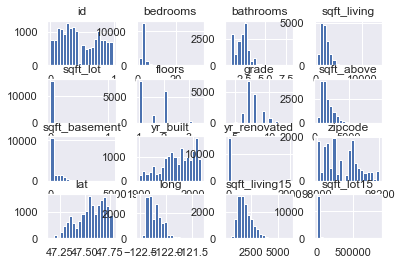

In [121]:
x_train.hist(bins=20)

<AxesSubplot:>

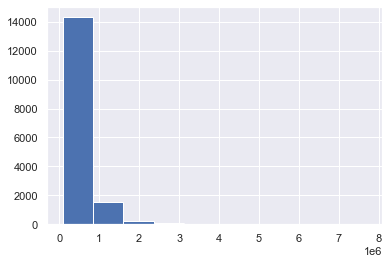

In [80]:
y_train.hist()

In [81]:
# y_train = np.log(y_train)
# y_train.hist()

## Model Construction

### Build a baseline Model

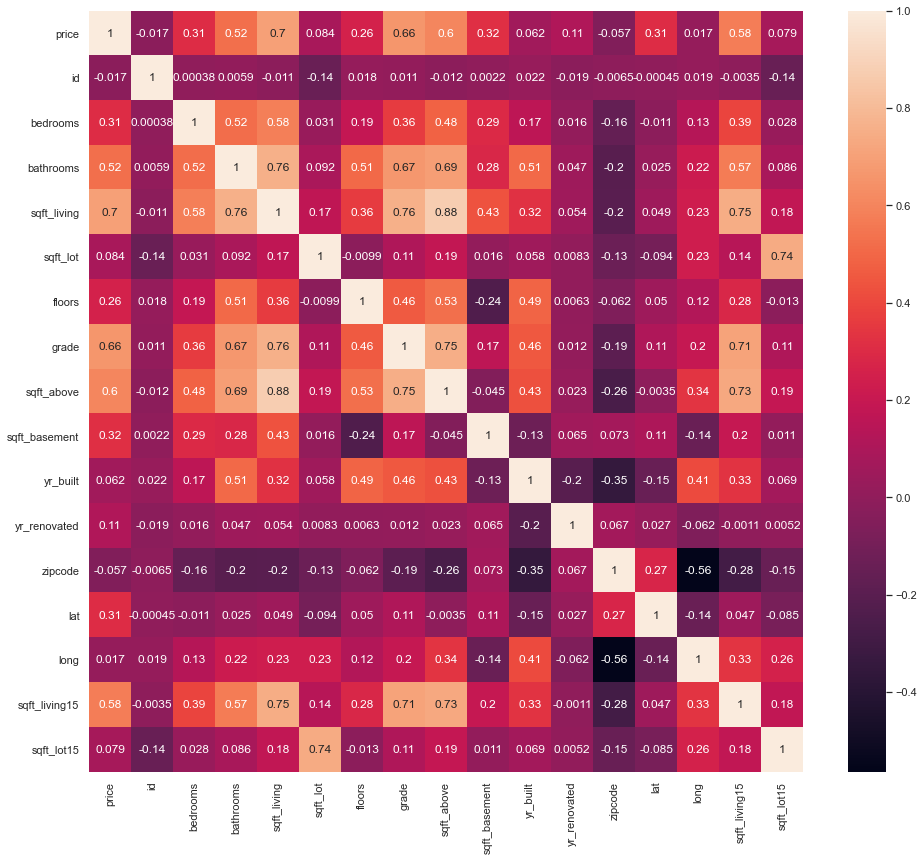

In [82]:
heatmap_data = pd.concat([y_train, x_train], axis=1)
corr = heatmap_data.corr()
sns.set(rc={'figure.figsize':(16, 14)})
sns.heatmap(data=corr, annot=True);

In [83]:
price_corrs = heatmap_data.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.698207
grade            0.661352
sqft_above       0.604313
sqft_living15    0.577119
bathrooms        0.523714
sqft_basement    0.318573
bedrooms         0.308370
lat              0.305144
floors           0.258338
yr_renovated     0.114312
sqft_lot         0.083760
sqft_lot15       0.078966
yr_built         0.062215
zipcode          0.056704
long             0.017179
id               0.016776
Name: price, dtype: float64

In [84]:
# house_preds = df[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms']]
# house_target = df['price']
# lr = LinearRegression().fit(house_preds, house_target)
# lr.score(house_preds, house_target)
# ## multicollinear problem as 0.88, 0.76, 0.76 are pretty high

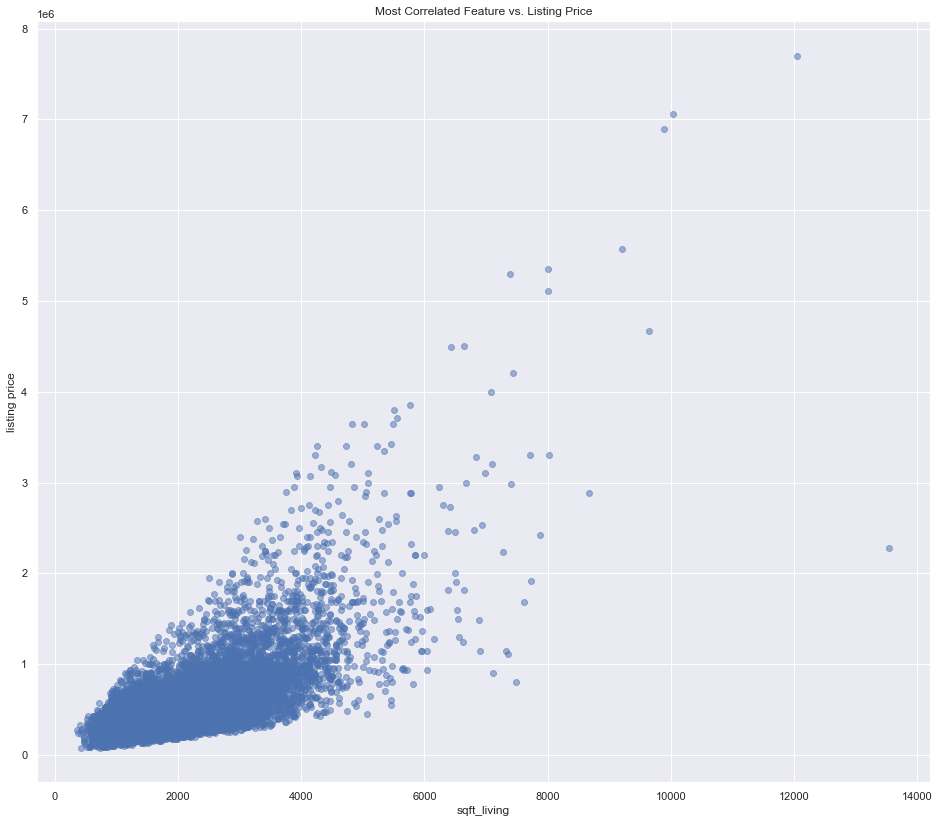

In [85]:
most_correlated_feature = "sqft_living"

fig, ax = plt.subplots()
ax.scatter(x_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [86]:
baseline_model = LinearRegression()

In [87]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.75, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=x_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.49108895229656085
Validation score: 0.4851692639222354


In [88]:
baseline_scores

{'fit_time': array([0.00299215, 0.00199461, 0.00199485]),
 'score_time': array([0.00199366, 0.00199485, 0.0010004 ]),
 'test_score': array([0.48063605, 0.48154176, 0.49332998]),
 'train_score': array([0.5068912 , 0.49686782, 0.46950784])}

### Model with Only Numeric Features

In [89]:
x_train_numeric = x_train.select_dtypes("number").copy()
x_train_numeric

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3990,8631600025,4,1.50,2290,8773,1.0,7,1330,960.0,1947,0.0,98133,47.7173,-122.330,1740,7058
16939,2223059099,3,1.50,1500,10018,1.0,7,1500,0.0,1957,0.0,98058,47.4680,-122.163,1500,10937
9533,2919200665,3,1.75,2145,3840,1.5,8,2145,0.0,1910,0.0,98103,47.6875,-122.357,1140,3840
6473,9512500460,3,1.50,1560,9350,1.0,7,1220,340.0,1969,0.0,98052,47.6729,-122.148,1870,8671
15787,2044500213,4,2.00,1870,6000,1.5,7,1870,0.0,1956,0.0,98125,47.7155,-122.315,1520,7169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967,1545800290,4,2.50,1700,6675,2.0,7,1700,0.0,1997,0.0,98038,47.3638,-122.053,1570,7540
8986,7795810110,3,1.75,1430,9857,1.0,7,1140,290.0,1980,0.0,98045,47.4964,-121.771,1310,9880
17312,8651410670,3,1.00,920,6460,1.0,6,920,0.0,1969,0.0,98042,47.3665,-122.082,920,4770
10737,3317500070,4,2.75,3840,10004,1.0,9,2110,1730.0,1963,0.0,98040,47.5606,-122.225,3500,12118


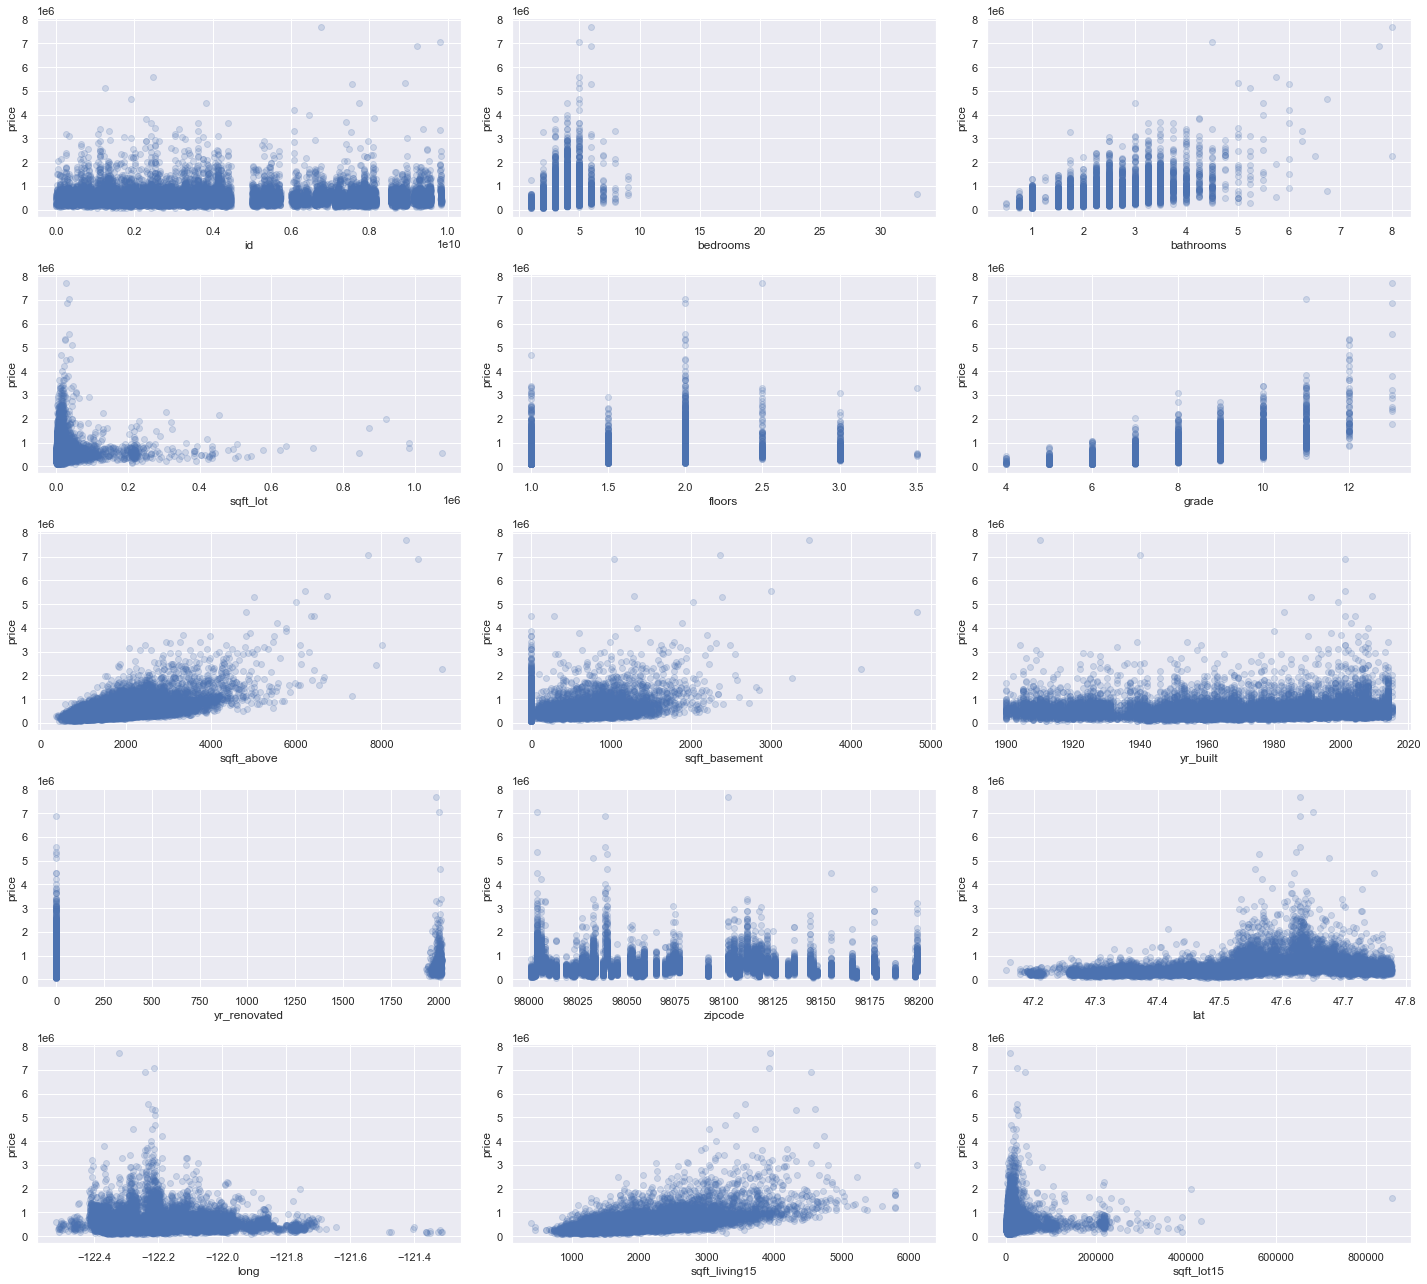

In [90]:
scatterplot_data = x_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(20, 18))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(x_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [91]:
## drop id, 
x_train_second_model = x_train_numeric.drop('id', axis=1).copy()
x_train_second_model = x_train_numeric.drop('yr_renovated', axis=1).copy()
x_train_second_model = x_train_numeric.drop('sqft_basement', axis=1).copy()
x_train_second_model

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3990,8631600025,4,1.50,2290,8773,1.0,7,1330,1947,0.0,98133,47.7173,-122.330,1740,7058
16939,2223059099,3,1.50,1500,10018,1.0,7,1500,1957,0.0,98058,47.4680,-122.163,1500,10937
9533,2919200665,3,1.75,2145,3840,1.5,8,2145,1910,0.0,98103,47.6875,-122.357,1140,3840
6473,9512500460,3,1.50,1560,9350,1.0,7,1220,1969,0.0,98052,47.6729,-122.148,1870,8671
15787,2044500213,4,2.00,1870,6000,1.5,7,1870,1956,0.0,98125,47.7155,-122.315,1520,7169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967,1545800290,4,2.50,1700,6675,2.0,7,1700,1997,0.0,98038,47.3638,-122.053,1570,7540
8986,7795810110,3,1.75,1430,9857,1.0,7,1140,1980,0.0,98045,47.4964,-121.771,1310,9880
17312,8651410670,3,1.00,920,6460,1.0,6,920,1969,0.0,98042,47.3665,-122.082,920,4770
10737,3317500070,4,2.75,3840,10004,1.0,9,2110,1963,0.0,98040,47.5606,-122.225,3500,12118


In [92]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=x_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6537000520661337
Validation score: 0.6466924974398253

Baseline Model
Train score:      0.49108895229656085
Validation score: 0.4851692639222354


### select the best combinations of features

In [93]:
sm.OLS(y_train, sm.add_constant(x_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2013.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        13:48:04   Log-Likelihood:            -2.2214e+05
No. Observations:               16198   AIC:                         4.443e+05
Df Residuals:                   16182   BIC:                         4.444e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.742e+06   3.62e+06      0.481      0.631   -5.36e+06    8.85e+06
id            -1.198e-06   6.08e-07     -1.971      0.049   -2.39e-06   -6.66e-09
bedrooms      -4.576e+04   2356.836    -19.415      0.000   -5.04e+04   -4.11e+04
bathrooms      4.326e+04   4095.482     10.562      0.000    3.52e+04    5.13e+04
sqft_living     184.1899      5.412     34.034      0.000     173.582     194.798
sqft_lot          0.0909      0.066      1.371      0.171      -0.039       0.221
floors         5864.4649   4516.800      1.298      0.194   -2988.963    1.47e+04
grade          1.018e+05   2712.967     37.526      0.000    9.65e+04    1.07e+05
sqft_above        9.9572      5.394      1.846      0.065      -0.615      20.529
yr_built      -3074.9789     85.421    -35.998      0.000   -3242.414   -2907.544
yr_renovated     26.9138      4.891      5.503      0.000      17.328      36.500
zipcode        -563.0045     41.137    -13.686      0.000    -643.638    -482.371
lat            5.592e+05   1.34e+04     41.864      0.000    5.33e+05    5.85e+05
long          -2.642e+05   1.65e+04    -16.059      0.000   -2.96e+05   -2.32e+05
sqft_living15    36.3510      4.238      8.577      0.000      28.043      44.659
sqft_lot15       -0.2587      0.097     -2.659      0.008      -0.449      -0.068
==============================================================================
Omnibus:                    15134.288   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1702738.545
Skew:                           4.149   Prob(JB):                         0.00
Kurtosis:                      52.538   Cond. No.                     1.14e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
significant_features = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
                        'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 

In [95]:
third_model = LinearRegression()
x_train_third_model = x_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=x_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6533379282710181
Validation score: 0.6473100506722766

Second Model
Train score:      0.6537000520661337
Validation score: 0.6466924974398253

Baseline Model
Train score:      0.49108895229656085
Validation score: 0.4851692639222354


### RFE approach

In [96]:
# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
x_train_for_RFECV = StandardScaler().fit_transform(x_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(x_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
id: False
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: False
floors: False
grade: True
sqft_above: True
yr_built: True
yr_renovated: True
zipcode: True
lat: True
long: True
sqft_living15: True
sqft_lot15: False


In [97]:
## drop the yr_build variable 
refined_features = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_basement', 
                    'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'] 

In [98]:
fourth_model = LinearRegression()
x_train_fourth_model = x_train[refined_features]

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=x_train_fourth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.65193565876338
Validation score: 0.6470443364987691

Third Model
Train score:      0.6533379282710181
Validation score: 0.6473100506722766

Second Model
Train score:      0.6537000520661337
Validation score: 0.6466924974398253

Baseline Model
Train score:      0.49108895229656085
Validation score: 0.4851692639222354


In [99]:
from itertools import combinations

features = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_basement', 
                    'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'] 

# Make a dataframe to hold the results (not strictly necessary
# but it makes the output easier to read)
results_df = pd.DataFrame(columns=features)

# Selecting just piece_count
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=third_model,
        X=x_train[["sqft_living", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    # Note: this technique of appending to a df is quite inefficient
    # Here it works because it's only happening 6 times, but avoid
    # doing this for a whole dataset
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=third_model,
        X=x_train[["sqft_living", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
for (feature1, feature2, feature3) in list(combinations(features[1:], 3)):
    scores = cross_validate(
        estimator=third_model,
        X=x_train[["sqft_living", feature1, feature2, feature3]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)  
    
for (feature1, feature2, feature3, feature4) in list(combinations(features[1:], 4)):
    scores = cross_validate(
        estimator=third_model,
        X=x_train[["sqft_living", feature1, feature2, feature3, feature4]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)   
    
for (feature1, feature2, feature3, feature4, feature5) in list(combinations(features[1:], 5)):
    scores = cross_validate(
        estimator=third_model,
        X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        feature5: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)  
    
for (feature1, feature2, feature3, feature4, feature5, feature6) in list(combinations(features[1:], 6)):
    scores = cross_validate(
        estimator=third_model,
        X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        feature5: "Yes",
        feature6: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)  
    
for (feature1, feature2, feature3, feature4, feature5, feature6, feature7) in list(combinations(features[1:], 7)):
    scores = cross_validate(
        estimator=third_model,
        X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6, feature7]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        feature5: "Yes",
        feature6: "Yes",
        feature7: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)  
    
for (feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8) in list(combinations(features[1:], 8)):
    scores = cross_validate(
        estimator=third_model,
        X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        feature5: "Yes",
        feature6: "Yes",
        feature7: "Yes",
        feature8: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)  
    
for (feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9) in list(combinations(features[1:], 9)):
    scores = cross_validate(
        estimator=third_model,
        X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        feature5: "Yes",
        feature6: "Yes",
        feature7: "Yes",
        feature8: "Yes",
        feature9: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)   
    
for (feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10) in list(combinations(features[1:], 10)):
    scores = cross_validate(
        estimator=third_model,
        X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        feature3: "Yes",
        feature4: "Yes",
        feature5: "Yes",
        feature6: "Yes",
        feature7: "Yes",
        feature8: "Yes",
        feature9: "Yes",
        feature10: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
    
    
# Including all 3 additional features
results_df = results_df.append({
    "bedrooms": "Yes", "bathrooms": "Yes", "sqft_living": "Yes", "grade": "Yes", "sqft_above": "Yes", "sqft_basement": "Yes",
    "yr_built": "Yes", "zipcode":"Yes", "lat": "Yes", "long":"Yes", "sqft_living15": "Yes",
    "train_score": third_model_scores["train_score"].mean(),
    "val_score": third_model_scores["test_score"].mean()
}, ignore_index=True)

# Fill in remaining values where appropriate
results_df["sqrt_living"] = "Yes"
results_df.fillna("No", inplace=True)

results_df

,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,train_score,val_score,sqrt_living
0,No,No,No,No,No,No,No,No,No,No,No,0.491089,0.485169,Yes
1,No,Yes,No,No,No,No,No,No,No,No,No,0.491342,0.485073,Yes
2,No,No,Yes,No,No,No,No,No,No,No,No,0.491089,0.485169,Yes
3,No,No,No,Yes,No,No,No,No,No,No,No,0.527246,0.526682,Yes
4,No,No,No,No,Yes,No,No,No,No,No,No,0.491426,0.485373,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.607240,0.602400,Yes
1021,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.642849,0.639014,Yes
1022,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.641390,0.637357,Yes
1023,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.642849,0.639014,Yes


In [102]:
results_df.sort_values(ascending=False, by='val_score')

,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,train_score,val_score,sqrt_living
1024,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.653338,0.647310,Yes
1023,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.642849,0.639014,Yes
1021,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.642849,0.639014,Yes
988,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,0.642115,0.638999,Yes
924,No,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,0.642115,0.638999,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,No,Yes,Yes,No,Yes,Yes,No,No,No,No,No,0.491804,0.485237,Yes
2,No,No,Yes,No,No,No,No,No,No,No,No,0.491089,0.485169,Yes
0,No,No,No,No,No,No,No,No,No,No,No,0.491089,0.485169,Yes
11,No,Yes,Yes,No,No,No,No,No,No,No,No,0.491342,0.485073,Yes


In [103]:
best_features = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_basement', 
                    'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'] 
x_train_final = x_train[best_features]
x_test_final = x_test[best_features]

final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(x_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(x_test_final, y_test)

0.6854752135057635

In [104]:
mean_squared_error(y_test, final_model.predict(x_test_final), squared=False)
## not a good number

201131.2315810874

In [105]:
print(pd.Series(final_model.coef_, index=x_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

bedrooms         -46015.748604
bathrooms         48070.555829
sqft_living         131.611346
grade            102813.296991
sqft_above           63.096995
sqft_basement        50.331780
yr_built          -3165.135931
zipcode            -555.966120
lat              559472.353838
long            -270210.020659
sqft_living15        34.171314
Name: Coefficients, dtype: float64

Intercept: 471992.06838227465


## Violation Tests

### Invvestigating Linearity

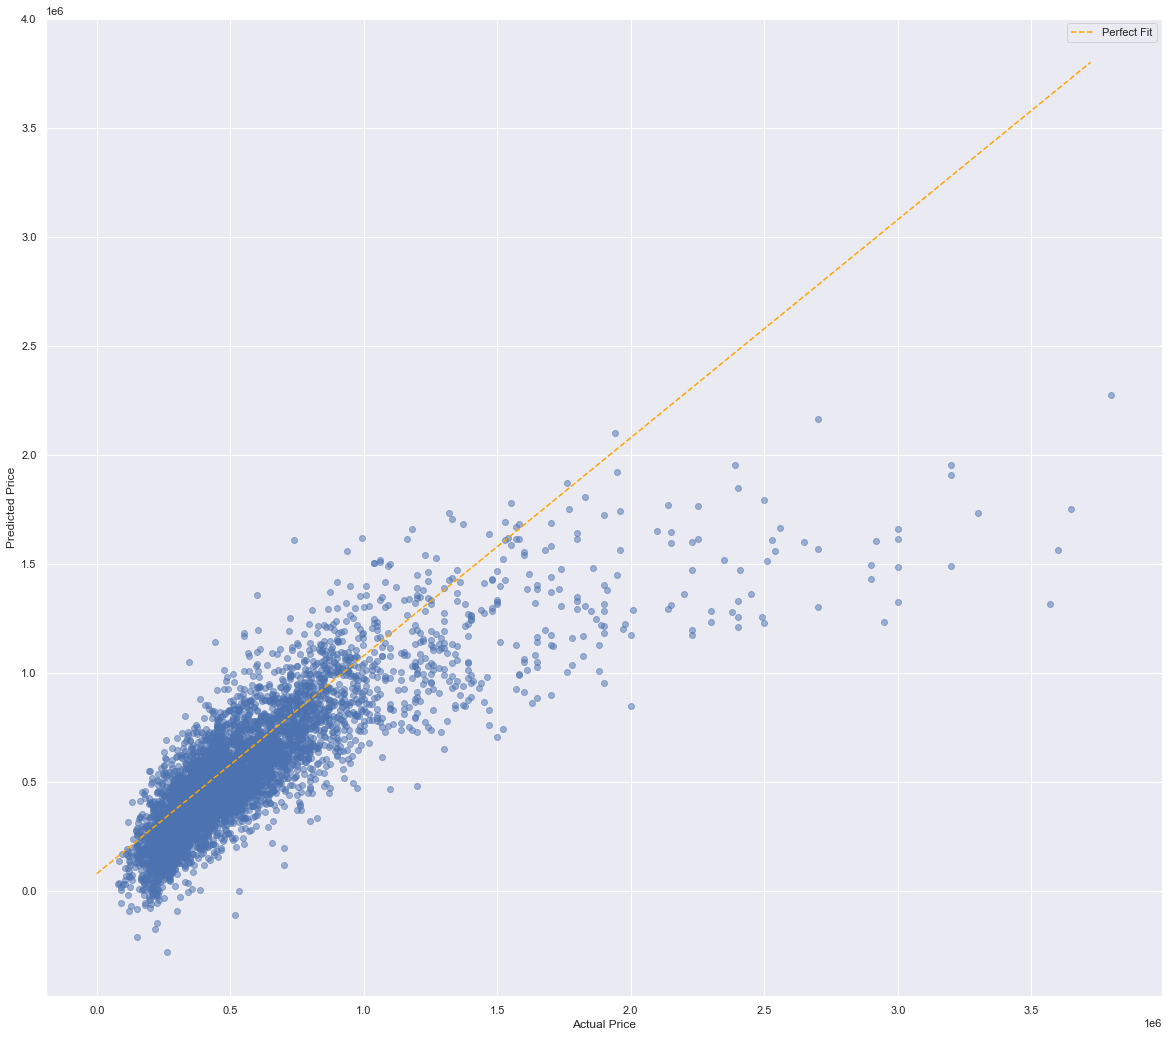

In [106]:
preds = final_model.predict(x_test_final)
fig, ax = plt.subplots(figsize=(20, 18))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
# ax.set_facecolor("white")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

## looks like we have a linear relationship

### Investigating Normality

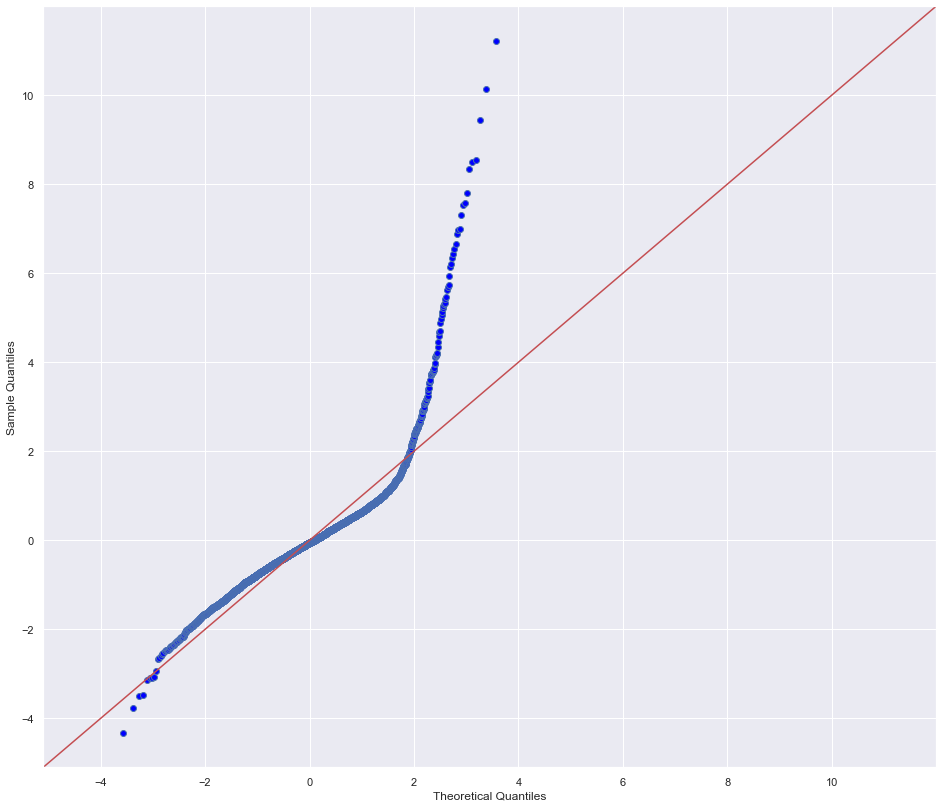

In [107]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

## Outliers violating normality

###  Investigating Multicollinearity

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_train_final.values, i) for i in range(x_train_final.shape[1])]
pd.Series(vif, index=x_train_final.columns, name="Variance Inflation Factor")

## there is multicollinearity problem

bedrooms         2.253853e+01
bathrooms        2.602540e+01
sqft_living      8.608045e+02
grade            1.458572e+02
sqft_above       6.411087e+02
sqft_basement    4.513684e+01
yr_built         7.629507e+03
zipcode          1.532596e+06
lat              1.340724e+05
long             1.294945e+06
sqft_living15    2.536054e+01
Name: Variance Inflation Factor, dtype: float64

### Investigating Homoscedasticity

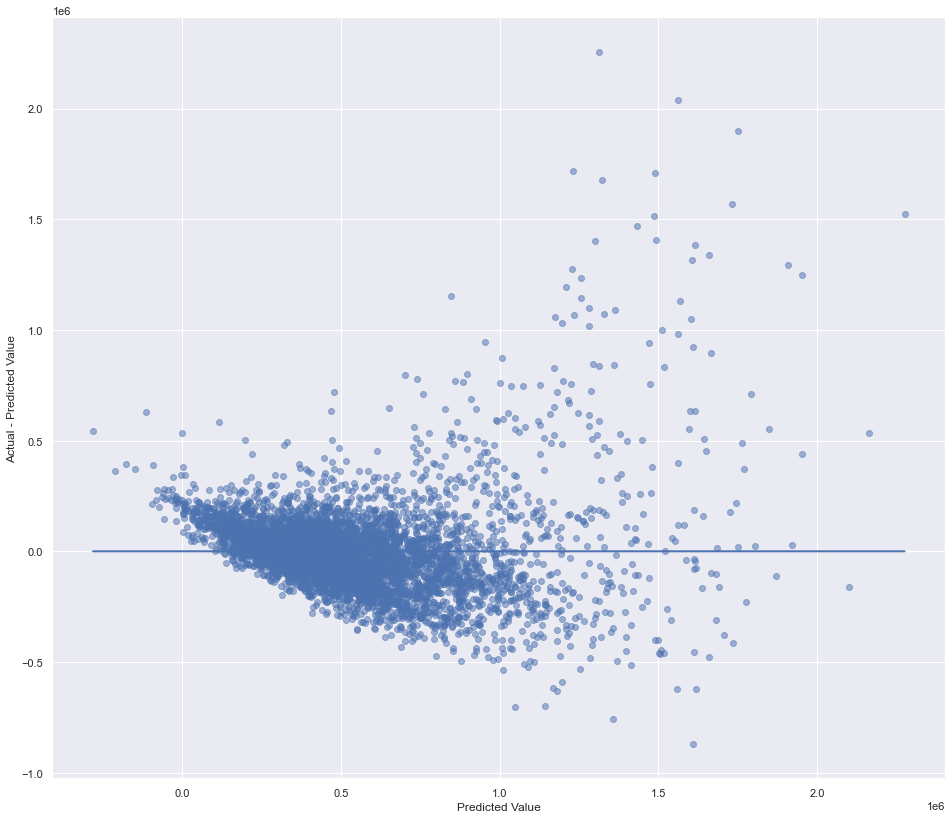

In [109]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(x_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

## violating homoscedasticity